In [3]:
import fsps
import matplotlib.pyplot as plt
import numpy as np
from astropy.cosmology import WMAP9 as cosmo
import pandas as pd
from astropy import units as u

In [10]:
sp1 = fsps.StellarPopulation(compute_vega_mags=False, zcontinuous=1, sfh=4)
#sp1.set_tabular_sfh(age=np.array([0.0, 13.7]), sfr=np.array([10., 10.]))

In [13]:
wav, spec = sp1.get_spectrum(tage=13.7)

In [10]:
sp1.dust_mass

8.537021540752456e-06

Text(0.5,0,'$\\lambda$ [$\\AA$]')

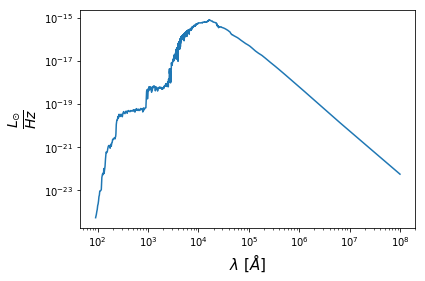

In [14]:
plt.plot(wav,spec)
#spec is L_sun / Hz
plt.loglog()
#plt.ylim([1e-11, 1e-2])

plt.ylabel(r'$\frac{L_{\odot}}{Hz}$', fontsize=20)
plt.xlabel('$\lambda$ [$\AA$]', fontsize=15)

In [6]:
#convert flux to mJy, redshift of 0.1
wav_m = wav * 1e-10 #Angstrom to m conversion

spec_to_W = spec * 3.827e26  #now W/Hz

DL = (1e-5*u.Mpc).to(u.m)




conversion = (1./(4.*np.pi*(DL.value)**2)) * (1.0e26) * 1000.

to_flux = spec_to_W * conversion #now mJy
#mass_scaled_flux = to_flux  #scaling to 5e11 solar mass SED
wav_um = wav_m * 1.0e6

to_maggies = to_flux / 1000. / 3631.

Text(0,0.5,'Flux [mJy]')

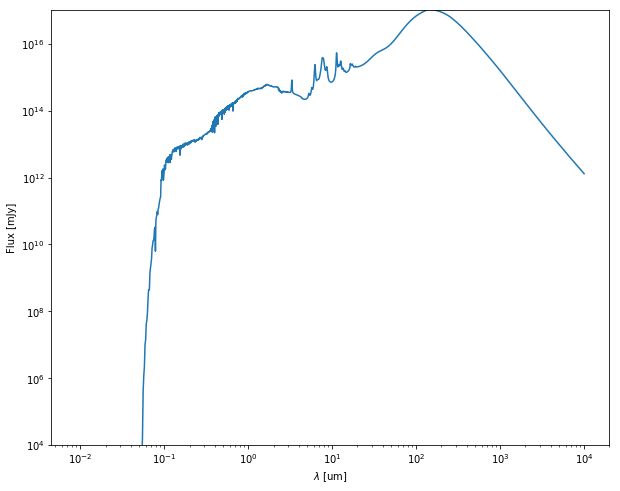

In [9]:
plt.figure(figsize=(10,8))
plt.plot(wav_um,to_flux)
#plt.scatter(filter_wavs, flx, marker='+', s=200, color='red')
#plt.errorbar(filter_wavs, flx, yerr=flxe, ls='None')
#spec is now W/Hz/m^2 = Jy, scaled to mJy
plt.loglog()
plt.ylim([1e4, 1e17])

plt.xlabel('$\lambda$ [um]')
plt.ylabel("Flux [mJy]")

#plt.savefig('/Users/sidneylower/Desktop/fsps_mockSED.png')